<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/05_svd_multilinear_boston_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVD:Multi-Linear Regression-Boston Housing data

Regression is an important statistical tool to relate variables to one another based on data.

We assume that the data is linearly related, and we use the pseudo-inverse to find the least-squares solution for the slope x below (blue dashed line).

$$ Ax = b $$
$$ A = U \Sigma V^T $$
$$ x = A^{-1}b $$
$$ x = \left ( U \Sigma V^T \right )^{-1} b $$
$$ x = \tilde V \tilde \Sigma^{-1} \tilde U^* b $$

Where, $\tilde \Sigma = ||a||_2, \tilde V = 1$ and $\tilde U = \frac {a}{||a||_2}$. so we can take the left pseudo-inverse.

$$ x = \frac {a*b}{||a||_2^2} $$

<img src='https://github.com/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/images/svd3.png?raw=1' width='400'/>

This makes physical sense, if we think of $x$ as the value that best maps our vector $a$ to the vector $b$. Then, the best single value $x$ is obtained by taking the dot product of $b$ with the normalized $a$ direction. We then add a second normalization factor $||a||_2$ because the $a$ in is not normalized.


Note that strange things happen if you use row vectors instead of column vectors. 

Also, if the noise magnitude becomes large relative to the slope $x$, the pseudoinverse will undergo a phase-change in accuracy, related to the hard-thresholding results.

##Setup

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

In [ ]:
%%shell

wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-driven-science-and-engineering/01-svd/datasets/housing.data

##Boston Housing Data

In this example, we explore a larger data set to determine which factors best predict prices
in the Boston housing market.

There are 13 attributes that are correlated with house price, such as per capita crime rate
and property-tax rate. These features are regressed onto the price data, and the best fit price
prediction is plotted against the true house value and the regression coefficients.

Although the house value is not perfectly predicted, the trend agrees
quite well. It is often the case that the highest value outliers are not well-captured by simple
linear fits, as in this example.

This data contains prices and attributes for 506 homes, so the attribute matrix is of size
506 × 13. It is important to pad this matrix with an additional column of ones, to take into account the possibility of a nonzero constant offset in the regression formula. This
corresponds to the “y-intercept” in a simple one-dimensional linear regression.

Let's load data.

In [3]:
# Load dataset
H = np.loadtxt("housing.data")

b = H[:, -1]    # housing values in $1000s
A = H[:, :-1]   # other factors

# Pad with ones for nonzero offset
A = np.pad(A, [(0, 0), (0, 1)], mode="constant", constant_values=1)

Let's compute $Ax=b$ using the SVD approximation.

In [4]:
# Solve Ax=b using the SVD
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b  

Let's plot the fit.

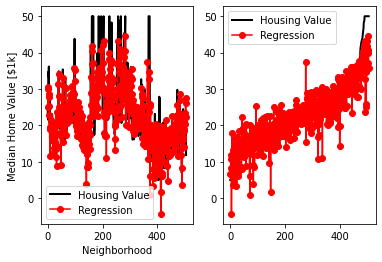

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)

sort_ind = np.argsort(H[:, -1])
b = b[sort_ind] # sorted values

plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind, :] @ x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.legend()

plt.show()

Now, let's plot attribute significance.

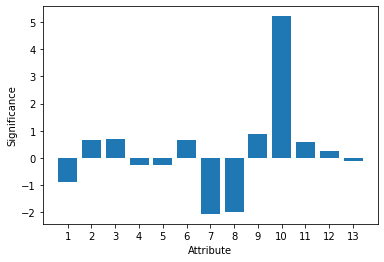

In [8]:
A_mean = np.mean(A, axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0], 1)) @ A_mean.T

for j in range(A.shape[1] - 1):
  A2std = np.std(A2[:, j])
  A2[:, j] = A2[:, j] / A2std

A2[:, -1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x) - 1) + np.ones(len(x) - 1)

plt.bar(x_tick, x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()